In [1]:
import pandas as pd
df=pd.read_csv('/Users/rahul/Documents/Google/data/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [3]:
#mapping the value 3 to 8 to 0 to 5
quality_mapping={
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
#column to values in the dictionary
df.loc[:,"quality"]=df.quality.map(quality_mapping)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


## Decision tree with depth 3 

In [5]:
#use sampe frac=1 to shuffle the dataframe
#we reset the indices since they change after
#shuffling the dataframe
df=df.sample(frac=1).reset_index(drop=True)
#top 1000 rows are selected
df_train=df.head(1000)
#bottom 599 values are selected
#for testing /validation
df_test=df.tail(599)

In [6]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,3
1,8.2,0.70,0.23,2.0,0.099,14.0,81.0,0.99730,3.19,0.70,9.4,2
2,11.1,0.35,0.48,3.1,0.090,5.0,21.0,0.99860,3.17,0.53,10.5,2
3,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,4
4,8.7,0.69,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,3


In [7]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1000,7.2,0.530,0.13,2.00,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,3
1001,10.5,0.260,0.47,1.90,0.078,6.0,24.0,0.99760,3.18,1.04,10.9,4
1002,8.9,0.875,0.13,3.45,0.088,4.0,14.0,0.99940,3.44,0.52,11.5,2
1003,8.3,0.490,0.36,1.80,0.222,6.0,16.0,0.99800,3.18,0.60,9.5,3
1004,10.0,0.350,0.47,2.00,0.061,6.0,11.0,0.99585,3.23,0.52,12.0,3


In [8]:
# decision tree model from scikit-learn
from sklearn import tree
from sklearn import metrics

In [9]:
df_test.columns.values[0:11]

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [10]:
#intialize decision tree classfier class
#with a max depth of 3
clf=tree.DecisionTreeClassifier(max_depth=3)
#choss the traning column
cols=df_test.columns.values[0:11]
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=3)

### test the accuracy

In [11]:
#generate prediction on the training set
train_predictions=clf.predict(df_train[cols])
#generate predictions on the test set
test_predictions=clf.predict(df_test[cols])
#calculate the accuracy of traning dataset
train_accuracy=metrics.accuracy_score(df_train.quality,train_predictions)
#calculate the accuracy of test data
test_accuracy=metrics.accuracy_score(df_test.quality,test_predictions)
print("training accuracy with depth 3=",train_accuracy," test accuracy with depth 3=",test_accuracy)

training accuracy with depth 3= 0.611  test accuracy with depth 3= 0.5709515859766278


# Decision tree with depth 7

In [12]:
#intialize decision tree classfier class
#with a max depth of 3
clf=tree.DecisionTreeClassifier(max_depth=7)
#choss the traning column
cols=df_test.columns.values[0:11]
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [13]:
#generate prediction on the training set
train_predictions=clf.predict(df_train[cols])
#generate predictions on the test set
test_predictions=clf.predict(df_test[cols])
#calculate the accuracy of traning dataset
train_accuracy=metrics.accuracy_score(df_train.quality,train_predictions)
#calculate the accuracy of test data
test_accuracy=metrics.accuracy_score(df_test.quality,test_predictions)
print("training accuracy with depth 3=",train_accuracy," test accuracy with depth 3=",test_accuracy)

training accuracy with depth 3= 0.776  test accuracy with depth 3= 0.5909849749582637


## Accuracy has improved from depth=7 , train=0.781 from0.583   ,test=0.5826377295492488 from 0.564273789649

#  decision tree with depth 1-25

In [14]:
from sklearn import tree
from sklearn import metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#this is our gloabal size of label text
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
%matplotlib inline

In [16]:
df_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1000,7.2,0.530,0.13,2.00,0.058,18.0,22.0,0.99573,3.21,0.68,9.9,3
1001,10.5,0.260,0.47,1.90,0.078,6.0,24.0,0.99760,3.18,1.04,10.9,4
1002,8.9,0.875,0.13,3.45,0.088,4.0,14.0,0.99940,3.44,0.52,11.5,2
1003,8.3,0.490,0.36,1.80,0.222,6.0,16.0,0.99800,3.18,0.60,9.5,3
1004,10.0,0.350,0.47,2.00,0.061,6.0,11.0,0.99585,3.23,0.52,12.0,3


In [17]:
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4,3
1,8.2,0.70,0.23,2.0,0.099,14.0,81.0,0.99730,3.19,0.70,9.4,2
2,11.1,0.35,0.48,3.1,0.090,5.0,21.0,0.99860,3.17,0.53,10.5,2
3,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,4
4,8.7,0.69,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6,3


In [18]:
#initialize lists to store accuracies
#for training and test data
#we start with 50% accuracy
train_accuracies=[0.5]
test_accuracies=[0.5]
cols=df_test.columns.values[0:11]

In [19]:
#Iterate over few depth values
for depth1 in range(1,25):
    clf=tree.DecisionTreeClassifier(max_depth=depth1)
    clf.fit(df_train[cols],df_train.quality)
    train_prediction=clf.predict(df_train[cols])
    test_prediction=clf.predict(df_test[cols])
    #train and test accuracty
    train_accuracy=metrics.accuracy_score(df_train.quality,train_predictions)
    test_accuracy=metrics.accuracy_score(df_test.quality,test_predictions)
    #append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)


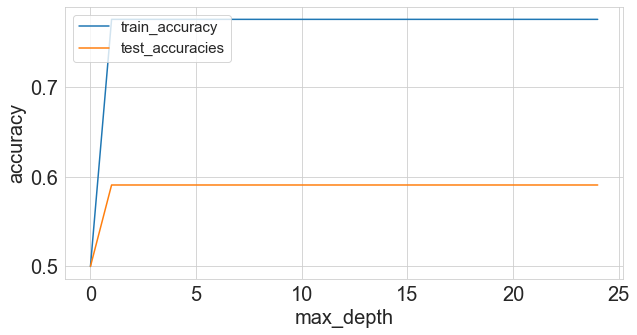

In [20]:
#creates two plots using matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train_accuracy")
plt.plot(test_accuracies,label="test_accuracies")
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()

## THis is class example of overfitting here,training data accuracy keeps but test accuracy becomes constant,since model learned the training data but he is not able to predict untrained data